# MarlimR3D

- I put all the papers in the `Literature` folder. You have to get the data yourself at the links provided at the end of this cell.

## Questions:
- We have to define our survey. The model is very extensive, and I think we should just have one line or so.
- The paper only presents the data as is; they do not compare the model with and without hydrocarbons in the reservoir. I wonder how big the difference would be.

## 3D Resistivity Model ($\rho_h$ and $\rho_v$)

- dx, dy, dz = $ 75 \times 25 \times 5 \, \text{m} $
- nx, ny, nz = $ 371 \times 1022 \times 1229 \, \text{m} $
- 465,990,098 cells

## Forward modelling mesh of original paper

- $ 56 \times 51 \times 6 \, \text{km} $
- dx, dy, dz = $ 100 \times 100 \times 20 \, \text{m} $
- nx, ny, nz = $ 563 \times 511 \times 310 \, \text{m} $
- 89,882,950 cells

## Acquisition parameters

- 500 receivers located on the irregular seafloor;
- for each receiver, sources were located along 45 towlines with a spacing of 1 km; 25 east-west, 20 north-south;
- source: azimuth and dip 0°, dipole length 278 m, dipole strength 1250 A, 50 m above sea floor.


![survey](../figures/survey.png)


#### References TODO: Replace by full references
- http://www.scielo.br/scielo.php?script=sci_arttext&pid=S2317-48892017000400633  # Model
- https://library.seg.org/doi/full/10.1190/geo2018-0452.1                         # Data
- https://zenodo.org/record/400233   # Model
- https://zenodo.org/record/1256787  # Data
- https://zenodo.org/record/1807135  # Data With Noise

In [1]:
import emg3d         # 3D modeller emg3d
import segyio
#import pyvista
import discretize    # for the meshing
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.colors import LogNorm

In [2]:
%matplotlib notebook
plt.style.use('ggplot')

## Load resistivity cubes

In [3]:
res_h = segyio.tools.cube('../DATA/Horizontal_resistivity.sgy')[:, :, ::-1]
res_v = segyio.tools.cube('../DATA/Vertical_Resistivity.sgy')[:, :, ::-1]

nx, ny, nz = res_h.shape
dx, dy, dz = 75, 25, 5

In [4]:
x0 = 1e100
y0 = 1e100
with segyio.open('../DATA/Horizontal_resistivity.sgy') as f:
    for i in range(nx*ny):
        if f.header[i][segyio.TraceField.CDP_X] < x0:
            x0 = f.header[i][segyio.TraceField.CDP_X]
        if f.header[i][segyio.TraceField.CDP_Y] < y0:
            y0 = f.header[i][segyio.TraceField.CDP_Y]
x0, y0 = x0/10, y0/10

## Initialize mesh

In [5]:
mesh = discretize.TensorMesh([np.ones(nx)*dx, np.ones(ny)*dy, np.ones(nz)*dz], x0=[x0, y0, 'N'])
mesh

TensorMesh: 465,990,098 cells

                      MESH EXTENT             CELL WIDTH      FACTOR
  dir    nC        min           max         min       max      max
  ---   ---  ---------------------------  ------------------  ------
   x    371    376,230.90    404,055.90     75.00     75.00    1.00
   y   1022  7,504,190.00  7,529,740.00     25.00     25.00    1.00
   z   1229     -6,145.00          0.00      5.00      5.00    1.00

<IPython.core.display.Javascript object>


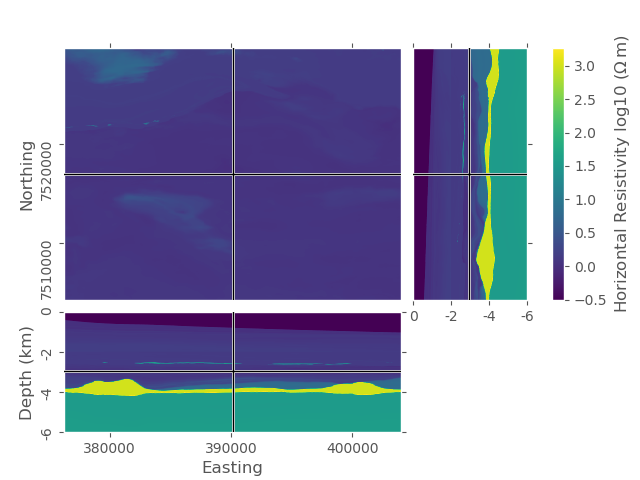

In [6]:
mesh.plot_3d_slicer(np.log10(res_h))

# Get principal figure axes
fig = plt.gcf()
axs = fig.get_children()

# Adjust the y-labels on the first subplot (XY)
plt.setp(axs[1].yaxis.get_majorticklabels(), rotation=90)
axs[1].set_yticks([7510000, 7520000, 7530000])
axs[1].set_ylabel('Northing')

# Adjust x- and y-labels on the second subplot (XZ)
axs[2].set_xticks([380000, 390000, 400000])
axs[2].set_xlabel('Easting')

plt.setp(axs[2].yaxis.get_majorticklabels(), rotation=90)
axs[2].set_yticks([0, -2000, -4000, -6000])
axs[2].set_yticklabels(['0', '-2', '-4', '-6'])
axs[2].set_ylabel('Depth (km)')

# Adjust x-labels on the third subplot (ZY)
axs[3].set_xticks([0, -2000, -4000, -6000])
axs[3].set_xticklabels(['0', '-2', '-4', '-6'])

# Adjust colorbar
axs[4].set_ylabel(r'Horizontal Resistivity log10 ($\Omega\,$m)')

# Ensure sufficient margins so nothing is clipped
plt.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9)

In [7]:
emg3d.Report([discretize])

--------------------------------------------------------------------------------
  Date: Mon Oct 21 15:40:00 2019 CEST

             Linux : OS
                 4 : CPU(s)
            x86_64 : Machine
             64bit : Architecture
           15.5 GB : RAM
           Jupyter : Environment

  Python 3.7.4 (default, Aug 13 2019, 20:35:49)  [GCC 7.3.0]

            0.4.10 : discretize
            1.17.2 : numpy
             1.3.1 : scipy
            0.45.1 : numba
             0.9.0 : emg3d
             7.8.0 : IPython
             3.1.1 : matplotlib

  Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------